In [1]:
#pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

In [2]:
#loading the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


x_train represents the pixels, while y_train represents the output. What the neural network needs to learn is how the pixels concentrate in each digit. y is the target (label, dependent variable), and the images consisting of pixels are x.

In [3]:
num_labels = len(np.unique(y_train))

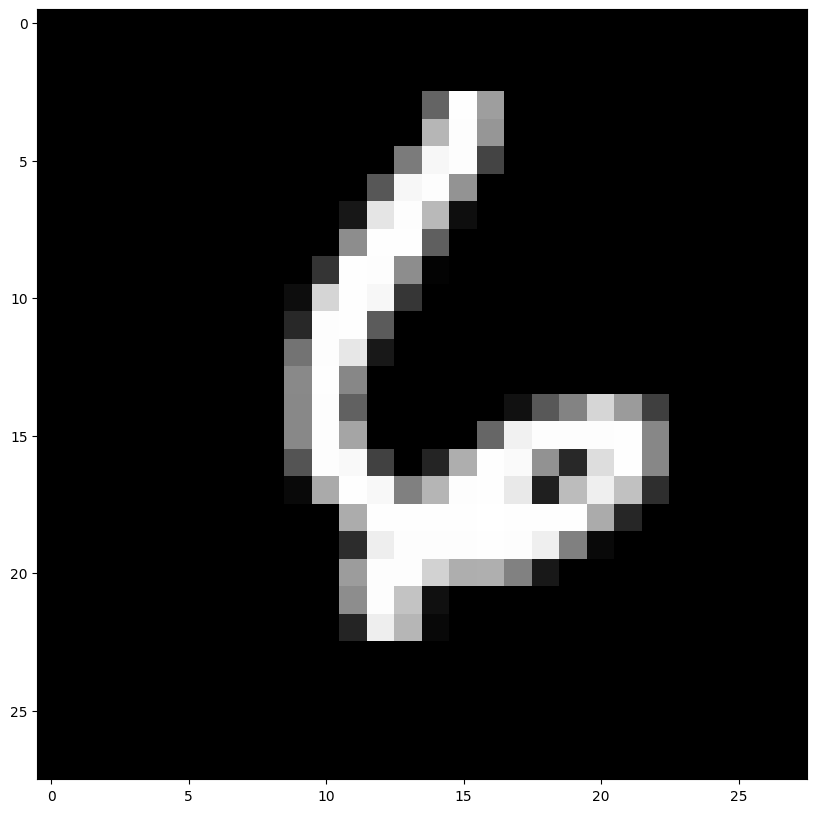

In [4]:
#showing Examples from the Dataset
plt.figure(figsize=(10,10))   # the dimensions of the image to be displayed should be 10 by 10.
plt.imshow(x_train[59000], cmap = 'gray')   # which color each image will appear in.

If we want to see not just one image on the screen but multiple images, we will do this with a for loop.

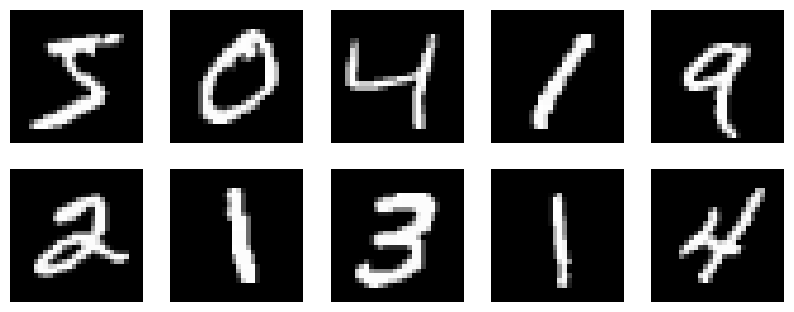

In [5]:
plt.figure(figsize=(10,10))
for n in range(10) :
  ax = plt.subplot(5,5,n+1)   #information about how it will appear on the screen
  plt.imshow(x_train[n], cmap ='gray')
  plt.axis('off')

Instead of showing the images repeatedly each time, we'll turn this into a function since it's a process we need.

In [6]:
def show_img(data) :
  plt.figure(figsize=(10,10))
  for n in range(10) :
    ax = plt.subplot(5,5,n+1)   #information about how it will appear on the screen
    plt.imshow(x_train[n], cmap ='gray')
    plt.axis('off')

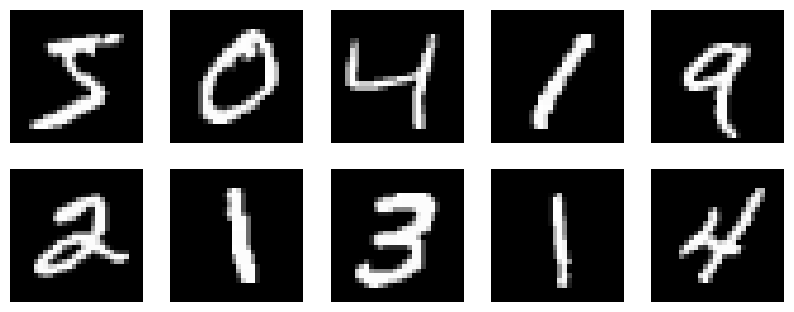

In [7]:
show_img(x_train)

Now, we can perform a visualization process related to the data we have. Before a visual is sent to a machine learning method, it needs to be transformed into mathematical representations. In the current phase, we will see how this happens. The computer uses codes called RGB (red, green, blue) codes to show us these pixel colors. All colors are created on these. (For example, r:250, g:10, b:240 gives us purple; if we set g to 0 and make r and b 250, we get a darker purple.)

In [8]:
x_train[2]  #providing information about the image at index 2

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [9]:
x_train[2][10,10]   #the pixel information at the 10th row and 10th column of the image at index 2

0

We can write a function to place the numerical values that form this visual on top of the visual.

In [10]:
def show_pixel(img) :
  fig = plt.figure(figsize= (12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width) :
    for y in range(height) :

          ax.annotate(str(round(img[x][y],2)), xy = (y,x),
                      color = 'white' if img[x][y]< threshold else 'black')

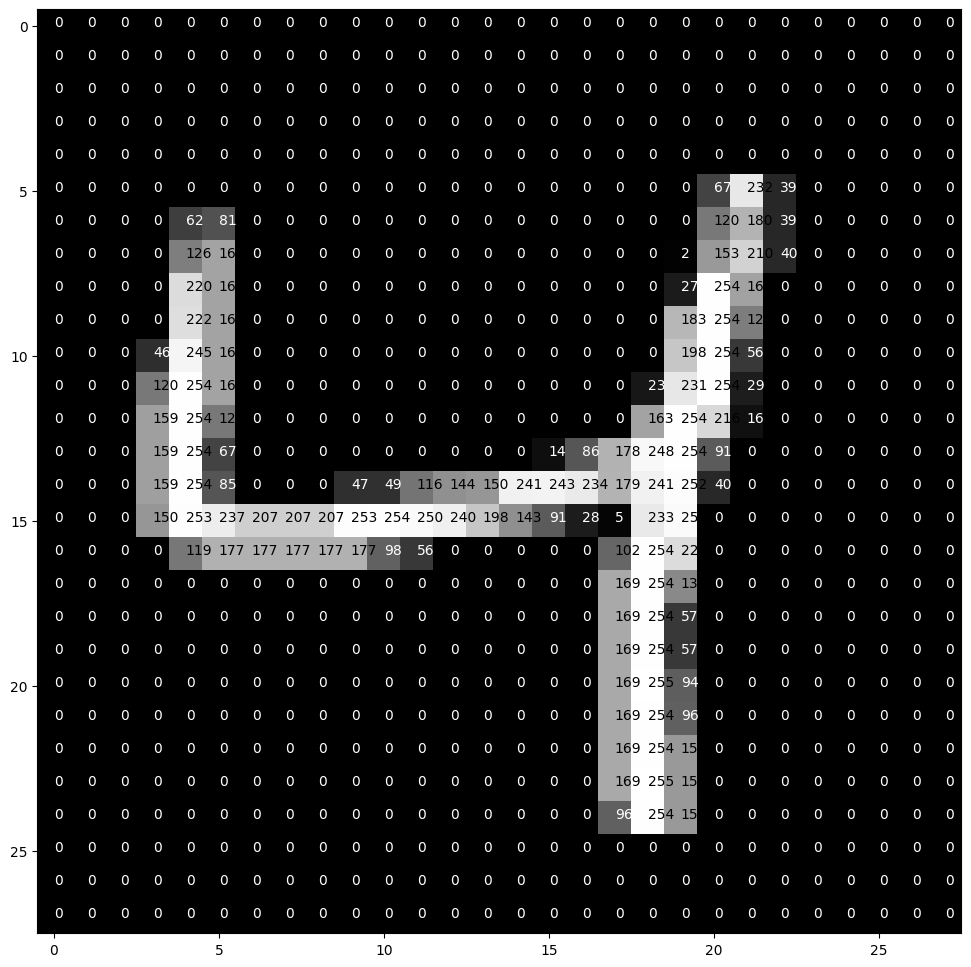

In [11]:
show_pixel(x_train[2])

After this stage, we will perform several operations to prepare the data. Encoding operations for the dependent variable, reshaping the data so that the neural network can understand it in its format, and normalization processes to convert the pixels into a specific format.

In [12]:
# encoding process for the dependent variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
#reshaping
image_size = x_train.shape[1]   #accessing the size information of the images

In [15]:
image_size

28

In [16]:
print(f"x_tranin boyutu : {x_train.shape}")
print(f"x_testin boyutu : {x_test.shape}")

x_tranin boyutu : (60000, 28, 28)
x_testin boyutu : (10000, 28, 28)


Each pixel contains a numerical value (28 by 28, with 784 pixels, each having a value between 0 and 255). The dimension in which these numbers are held also needs to be added here. Therefore, we need to reshape the x_test and x_train datasets.

In [17]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)   # 1 is a new channel. it holds the pixel values in the images. represents the 784 information.
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(f"x_tranin boyutu : {x_train.shape}")
print(f"x_testin boyutu : {x_test.shape}")

x_tranin boyutu : (60000, 28, 28, 1)
x_testin boyutu : (10000, 28, 28, 1)


Standardization - We will convert the pixels not from 0-255 but to between 0 and 1. Thus, the learning process of the neural network is positively affected, the training process proceeds faster, and the learning process progresses more accurately. The easiest way to do this is to divide them by 255. Those that are 255 will become 1, and those that are not will become 0.

In [18]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

DEFINING THE NEURAL NETWORK ARCHITECTURE

In [19]:
from threading import active_count

model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),  # conversion of reshaped input into a format understandable by the neural network
    Dense(units=128, activation='relu', name='layer1'),  # hidden layer with 128 neurons (think of 128 as the number of features to be extracted from the image)
    Dense(units=num_labels, activation='softmax', name='output_layer')])  # output layer (for multi-class classification)

model.compile(loss='categorical_crossentropy',  # loss function for more than two classes
              optimizer='adam',  # optimization method that will minimize the loss function
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])
# while minimizing the loss function, we determine the direction based on error metrics.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))
#batch size refers to the number of observation units to be handled in each iteration.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8363 - loss: 0.6006 - precision: 0.9325 - recall: 0.7108 - val_accuracy: 0.9431 - val_loss: 0.1904 - val_precision: 0.9583 - val_recall: 0.9323
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9527 - loss: 0.1706 - precision: 0.9636 - recall: 0.9410 - val_accuracy: 0.9601 - val_loss: 0.1364 - val_precision: 0.9690 - val_recall: 0.9529
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9661 - loss: 0.1217 - precision: 0.9739 - recall: 0.9581 - val_accuracy: 0.9668 - val_loss: 0.1103 - val_precision: 0.9734 - val_recall: 0.9613
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9740 - loss: 0.0919 - precision: 0.9793 - recall: 0.9687 - val_accuracy: 0.9705 - val_loss: 0.0991 - val_precision: 0.9766 - val_recall: 0.9667
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9799 - loss: 0.0709 - precision: 0.9838 - recall: 0.9759 - val_accuracy: 0.9735 - val_loss: 0.

MODEL PERFORMANCE EVULATION

In [22]:
#let's save the previous model.
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0251 - precision: 0.9948 - recall: 0.9929 - val_accuracy: 0.9763 - val_loss: 0.0781 - val_precision: 0.9789 - val_recall: 0.9751
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9955 - loss: 0.0202 - precision: 0.9960 - recall: 0.9946 - val_accuracy: 0.9772 - val_loss: 0.0780 - val_precision: 0.9794 - val_recall: 0.9754
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9956 - loss: 0.0185 - precision: 0.9963 - recall: 0.9949 - val_accuracy: 0.9774 - val_loss: 0.0770 - val_precision: 0.9795 - val_recall: 0.9758
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9959 - loss: 0.0160 - precision: 0.9964 - recall: 0.9953 - val_accuracy: 0.9777 - val_loss: 0.0768 - val_precision: 0.9795 - val_recall: 0.9771
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9975 - loss: 0.0132 - precision: 0.9978 - recall: 0.9971 - val_accuracy: 0.9781 - val_loss: 0.

Text(0.5, 1.0, 'Training and Test Loss Graph')

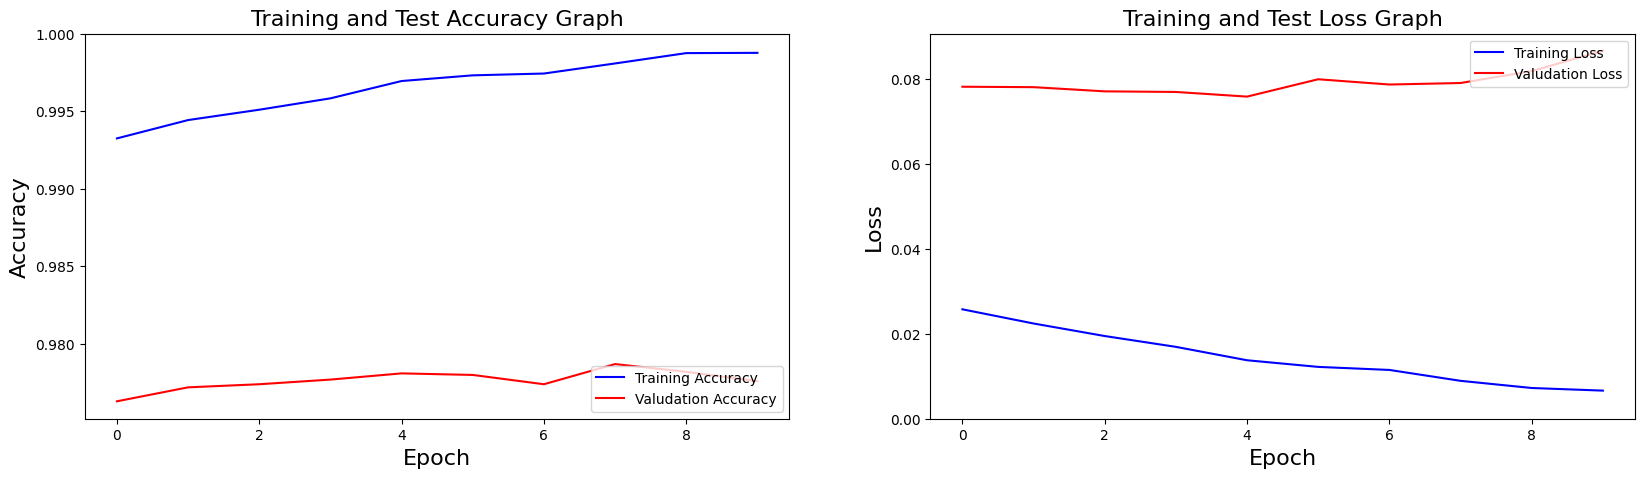

In [23]:
###################### graphs for accuracy #######################
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b' , label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r' , label='Valudation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Test Accuracy Graph', fontsize=16)

######################## graphs for loss #########################
plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b' , label='Training Loss')
plt.plot(history.history['val_loss'], color='r' , label='Valudation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Test Loss Graph', fontsize=16)

In [24]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose = False)
print("\nTest Accuracy : %.1f%%" % (100.0 * acc))
print("\nTest Loss : %.1f%%" % (100.0 * loss))
print("\nTest Recall : %.1f%%" % (100.0 * recall))
print("\nTest Precision : %.1f%%" % (100.0 * precision))


Test Accuracy : 97.8%

Test Loss : 8.7%

Test Recall : 97.7%

Test Precision : 97.8%


If the values of precision, accuracy, and recall are very close to each other, we can understand that there are no imbalances between classes. For example, if we were to exemplify precision within the scope of our project, let's consider class '1' from 10 classified classes. It is the value that expresses how many of the predicted '1' classes are actually '1'. In summary, precision is the success of our predictions. Recall indicates how many of the classes are correct. It first looks at the actual values and then checks how many were predicted correctly.

SAVING AND USING THE MODEL FOR PREDICTION

In [25]:
model.save('mnist_model.h5')

In [26]:
# we randomly select an observation from the test data.
import random
random = random.randint(0, x_test.shape[0])

In [27]:
random

903

In [28]:
test_image = x_test[random]

In [29]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

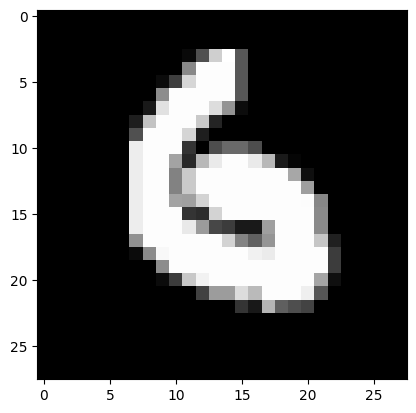

In [30]:
plt.imshow(test_image.reshape(28,28), cmap = 'gray')

In [31]:
test_data = x_train[random].reshape(1,28,28,1)

In [32]:
probability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [33]:
probability

array([[9.9844307e-01, 4.2048596e-12, 1.4862894e-03, 4.8325948e-09,
        4.1182176e-08, 2.2304268e-11, 2.3028169e-06, 1.7607379e-08,
        6.8283756e-05, 3.3118763e-09]], dtype=float32)

In [34]:
# we will find the probability with the highest value among the probabilities.
predicted_classes = np.argmax(probability)

In [35]:
predicted_classes

0

In [36]:
print(f"Predicted Class: {predicted_classes} \n")
print(f"Probability Values of the Predicted Class:{(np.argmax(probability, axis=1))[0]} \n")
print(f"Probability Values of Other Classes: \n {probability}")

Predicted Class: 0 

Probability Values of the Predicted Class:0 

Probability Values of Other Classes: 
 [[9.9844307e-01 4.2048596e-12 1.4862894e-03 4.8325948e-09 4.1182176e-08
  2.2304268e-11 2.3028169e-06 1.7607379e-08 6.8283756e-05 3.3118763e-09]]
